In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df = pd.read_csv('result_check.txt', sep= '\;')

C:\Users\BBoo\AppData\Local\Temp\ipykernel_17664\4135199633.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('result_check.txt', sep= '\;')


In [8]:
lst_x = ['pct', 'is_word1', 'is_word2', 'is_word3', 'is_word4', 'not_word', 'is_word1_ln',
       'is_word2_ln', 'is_word3_ln', 'is_word4_ln', 'not_word_ln', 'contain_ln_ln', 'contain_ln_fn']
lst = lst_x + ['is_vn']

In [9]:
data = df[lst]
data.fillna(0, inplace= True)

C:\Users\BBoo\AppData\Local\Temp\ipykernel_17664\3250695205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0, inplace= True)


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[lst_x],\
                                                     data['is_vn'], stratify=data['is_vn'], test_size= 0.3, random_state=42)
# tree = DecisionTreeClassifier(max_depth=8, random_state=42)
# tree.fit(X_train, y_train)
# print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
# print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

In [37]:
#feature_importances = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': tree.feature_importances_
# }).sort_values(by='Importance', ascending=False)
# print(feature_importances)

In [38]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(tree, X_train, y_train, cv=5)
# print("Cross-validation scores:", scores)
# print("Mean cross-validation score:", scores.mean())

In [39]:
# from sklearn.ensemble import GradientBoostingClassifier

# gbrt = GradientBoostingClassifier(max_depth= 5, n_estimators= 50, random_state=42, learning_rate= 0.5)
# gbrt.fit(X_train, y_train)
# print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
# print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 50, max_features= 5, random_state= 42)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.6f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.987
Accuracy on test set: 0.981884


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
accuracy_score(y_test, rf.predict(X_test))

0.9818840579710145

In [14]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, rf.predict(X_test))

array([[483,   0],
       [ 10,  59]], dtype=int64)

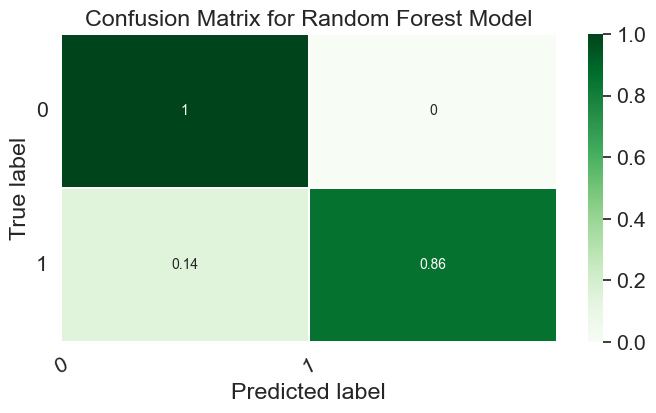

In [15]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rf.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [0, 1]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [16]:
# Precision = precision_score(actual, predicted)
# Sensitivity_recall = recall_score(actual, predicted)
# F1_score = f1_score(actual, predicted)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       483
           1       1.00      0.86      0.92        69

    accuracy                           0.98       552
   macro avg       0.99      0.93      0.96       552
weighted avg       0.98      0.98      0.98       552



In [17]:
feature_importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by= 'Importance', ascending= False)
print(feature_importances)

         Features  Importance
3        is_word3    0.272286
11  contain_ln_ln    0.246666
5        not_word    0.130295
7     is_word2_ln    0.127085
6     is_word1_ln    0.082100
12  contain_ln_fn    0.060741
2        is_word2    0.042276
1        is_word1    0.015042
10    not_word_ln    0.013568
8     is_word3_ln    0.004567
4        is_word4    0.004541
0             pct    0.000834
9     is_word4_ln    0.000000


In [47]:
# from sklearn.tree import export_graphviz
# export_graphviz(tree, out_file="tree.dot", class_names=["not_vn", "is_vn"],
# feature_names=X_train.columns, impurity=False, filled=True)
# import graphviz
# with open("tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

In [48]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

is_vn
0    0.771734
1    0.228266
Name: proportion, dtype: float64
is_vn
0    0.771748
1    0.228252
Name: proportion, dtype: float64


In [49]:
df_check = pd.read_csv('result_check.tab', sep= ';')
data_check = df_check[lst_x]

In [50]:
df_check['is_vn'] = rf.predict(data_check)

In [51]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors= 5)
# knn.fit(X_train, y_train)
# print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
# print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))
# df_check['is_vn2'] = knn.predict(data_check)
# df_check[df_check['is_vn2'] != df_check['is_vn']].to_excel('investigate.xlsx', index = False)

In [52]:
df_check[['memberid', 'firstname', 'lastname', 'is_vn']].to_excel('patron_DefineVNGuests.xlsx', index= False)